In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preprocessing

### (1) Data load

In [84]:
dataset = pd.read_csv('C:/data/banknote.csv',header=None)
# header = None: 첫번째 행이 column명이 아님
dataset

,0,1,2,3,4,5
0,3.62160,8.66610,-2.8073,-0.44699,1,0
1,4.54590,8.16740,-2.4586,-1.46210,1,0
2,3.86600,-2.63830,1.9242,0.10645,1,0
3,3.45660,9.52280,-4.0112,-3.59440,1,0
4,0.32924,-4.45520,4.5718,-0.98880,1,0
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,0,1
1368,-1.38870,-4.87730,6.4774,0.34179,0,1
1369,-3.75030,-13.45860,17.5932,-2.77710,0,1
1370,-3.56370,-8.38270,12.3930,-1.28230,0,1


### (2) X와 y 분리

In [85]:
banknote = dataset.values
# X: 모든 행, index 0~3열
X = banknote[:,:4]
# t: 모든 행, index 4,5열
t = banknote[:,4:]

### (3) 함수 정의

In [86]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [87]:
def d_sigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

In [88]:
def mse(y,t):
    return 0.5 * np.mean((y-t)**2)

In [89]:
def relu(a):
    return np.where(a>0,a,0)
# np.where(조건식,a,b): 조건식이 참이면 a, 거짓이면 b

In [90]:
def d_relu(a):
    return np.where(a>0,1,0)

# 2. MLP structure

In [91]:
print(X.shape,t.shape)

(1372, 4) (1372, 2)


In [92]:
# data sample의 수
num_data = X.shape[0]

# input layer node의 수
in_node = X.shape[1]

# 1st hidden layer node의 수
hid_node1 = 7

# 2nd hidden layer node의 수
hid_node2 = 5

# output layer node의 수
out_node = t.shape[1]

print(num_data, in_node, hid_node1, hid_node2, out_node)

1372 4 7 5 2


# 3. W와 B 초기값과 predict

### (1) W와 b 초기값

In [93]:
np.random.seed(42)
# output → 2nd hidden
W3_init = np.random.randn(out_node,hid_node2)
b3_init = np.random.randn(out_node)
# 2nd hidden → 1st hidden
W2_init = np.random.randn(hid_node2,hid_node1)
b2_init = np.random.randn(hid_node2)
# 1st hidden → input
W1_init = np.random.randn(hid_node1,in_node)
b1_init = np.random.randn(hid_node1)

### (2) predict

In [94]:
def predict(X,W1,b1,W2,b2,W3,b3):
    a1 = X.dot(W1.T) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(W2.T) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(W3.T) + b3
    y = sigmoid(a3)
    return a1,z1,a2,z2,a3,y

### (3) 초기 W, b값에 대한 X의 예측값(y)

In [95]:
_,_,_,_,_,y = predict(X,W1_init,b1_init,W2_init,b2_init,W3_init,b3_init)

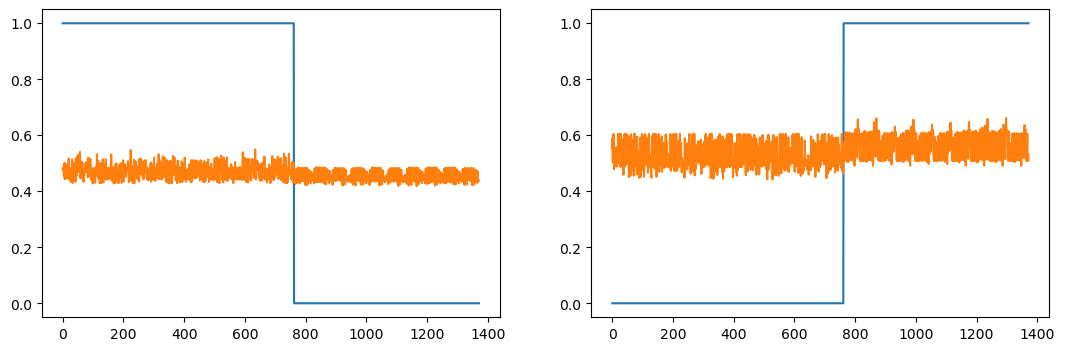

In [96]:
plt.figure(figsize=(13,4))

plt.subplot(121)
# plt.subplot(abc): a행b열로 차트를 구성하고, c번째에 차트를 그리시오,
plt.plot(t[:,0])
plt.plot(y[:,0])

plt.subplot(122)
plt.plot(t[:,1])
plt.plot(y[:,1])

# 4. BGD

### (1) parameter

In [97]:
learning_rate = 0.1
# epoch
epochs_BGD = 5000
# W와 b update 횟수
num_update_BGD = 0
# W와 b update 후의 loss(mse)
loss_BGD = []

In [98]:
W1 = W1_init
b1 = b1_init
W2 = W2_init
b2 = b2_init
W3 = W3_init
b3 = b3_init

### (2) BGD

In [99]:
for i in range(epochs_BGD):
    a1,z1,a2,z2,a3,y = predict(X,W1,b1,W2,b2,W3,b3)
    loss_BGD.append(mse(y,t))
    
    del_out = (y-t) * d_sigmoid(a3) 
    del_hid2 = del_out.dot(W3) * d_sigmoid(a2)
    del_hid1 = del_hid2.dot(W2) * d_sigmoid(a1)
        
    W3 = W3 - learning_rate * del_out.T.dot(z2) / num_data
    b3 = b3 - learning_rate * np.sum(del_out,axis=0) / num_data
    
    W2 = W2 - learning_rate * del_hid2.T.dot(z1) / num_data
    b2 = b2 - learning_rate * np.sum(del_hid2,axis=0) / num_data

    W1 = W1 - learning_rate * del_hid1.T.dot(X) / num_data
    b1 = b1 - learning_rate * np.sum(del_hid1,axis=0) / num_data
    
    num_update_BGD += 1

### (3) 결과 시각화

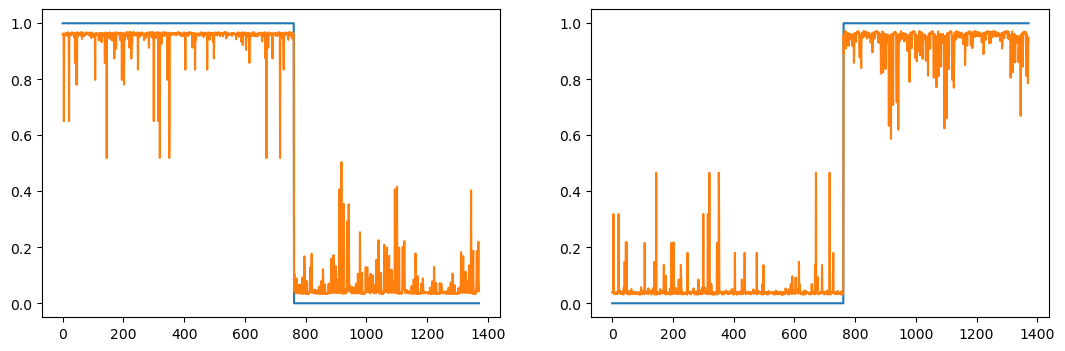

In [100]:
plt.figure(figsize=(13,4))
_,_,_,_,_,y_BGD = predict(X,W1,b1,W2,b2,W3,b3)
plt.subplot(121)
plt.plot(t[:,0])
plt.plot(y_BGD[:,0])
plt.subplot(122)
plt.plot(t[:,1])
plt.plot(y_BGD[:,1])

Text(0.5, 1.0, 'Batch Gradient Descent \n epochs: 5000, update: 5000\n final loss: 0.00261')

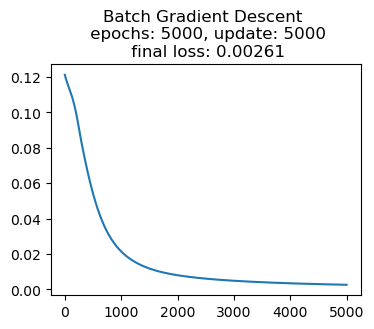

In [101]:
plt.figure(figsize=(4,3))
title = f'Batch Gradient Descent \n epochs: {epochs_BGD}, update: {num_update_BGD}\
\n final loss: {round(loss_BGD[-1],5)}'
plt.plot(loss_BGD)
plt.title(title)

# 5. SGD

### (1) parameter

In [102]:
learning_rate = 0.1
# epoch
epochs_SGD = 10
# W와 b update 횟수
num_update_SGD = 0
# W와 b update 후의 loss(mse)
loss_SGD = []

In [103]:
W1 = W1_init
b1 = b1_init
W2 = W2_init
b2 = b2_init
W3 = W3_init
b3 = b3_init

### (2) SGD

In [104]:
from sklearn.utils import shuffle

In [105]:
for i in range(epochs_SGD):
    # 1 epoch 마다 data를 shuffle한다.
    X_new,t_new = shuffle(X,t)
    for j in range(num_data):
        # ------------------------------------------------------------------------
        _,_,_,_,_,y_pred = predict(X,W1,b1,W2,b2,W3,b3)
        loss_SGD.append(mse(y_pred,t))
        # w와 b가 업데이트 된 후의 loss를 계산
        # ------------------------------------------------------------------------
        
        a1,z1,a2,z2,a3,y = predict(X_new[j:j+1],W1,b1,W2,b2,W3,b3)
        
        del_out = (y-t_new[j:j+1]) * d_sigmoid(a3) 
        del_hid2 = del_out.dot(W3) * d_sigmoid(a2)
        del_hid1 = del_hid2.dot(W2) * d_sigmoid(a1)

        # update에 반영되는 데이터의 수가 1개 이므로 전체 training data sample의 수가 아닌 1로 나눔
        W3 = W3 - learning_rate * del_out.T.dot(z2) / 1
        b3 = b3 - learning_rate * np.sum(del_out,axis=0) / 1

        W2 = W2 - learning_rate * del_hid2.T.dot(z1) / 1
        b2 = b2 - learning_rate * np.sum(del_hid2,axis=0) / 1

        W1 = W1 - learning_rate * del_hid1.T.dot(X_new[j:j+1]) / 1
        b1 = b1 - learning_rate * np.sum(del_hid1,axis=0) / 1

        num_update_SGD += 1

### (3) 결과 시각화

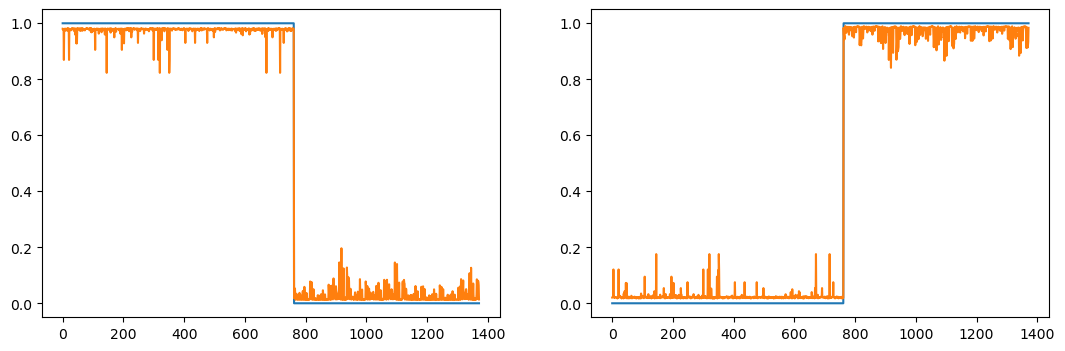

In [106]:
plt.figure(figsize=(13,4))
_,_,_,_,_,y_SGD = predict(X,W1,b1,W2,b2,W3,b3)
plt.subplot(121)
plt.plot(t[:,0])
plt.plot(y_SGD[:,0])
plt.subplot(122)
plt.plot(t[:,1])
plt.plot(y_SGD[:,1])

Text(0.5, 1.0, 'Stochastic Gradient Descent \n epochs: 10, update: 13720\n final loss: 0.00051')

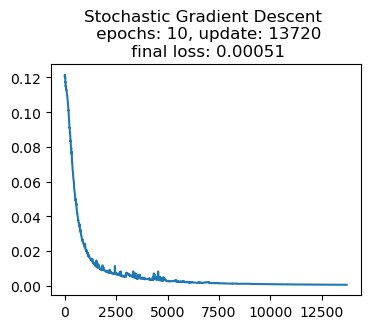

In [107]:
plt.figure(figsize=(4,3))
title = f'Stochastic Gradient Descent \n epochs: {epochs_SGD}, update: {num_update_SGD}\
\n final loss: {round(loss_SGD[-1],5)}'
plt.plot(loss_SGD)
plt.title(title)

In [108]:
# momentum SGD

learning_rate = 0.1
# epoch
epochs_SGDm = 10
# W와 b update 횟수
num_update_SGDm = 0
# W와 b update 후의 loss(mse)
loss_SGDm = []

In [109]:
W1 = W1_init
b1 = b1_init
W2 = W2_init
b2 = b2_init
W3 = W3_init
b3 = b3_init

In [110]:
vW1 = np.zeros(shape=W1.shape)
vb1 = np.zeros(shape=b1.shape)
vW2 = np.zeros(shape=W2.shape)
vb2 = np.zeros(shape=b2.shape)
vW3 = np.zeros(shape=W3.shape)
vb3 = np.zeros(shape=b3.shape)

alpha = 0.3

In [111]:
from sklearn.utils import shuffle

In [112]:
for i in range(epochs_SGDm):
    # 1 epoch 마다 data를 shuffle한다.
    X_new,t_new = shuffle(X,t)
    for j in range(num_data):
        # ------------------------------------------------------------------------
        _,_,_,_,_,y_pred = predict(X,W1,b1,W2,b2,W3,b3)
        loss_SGDm.append(mse(y_pred,t))
        # w와 b가 업데이트 된 후의 loss를 계산
        # ------------------------------------------------------------------------
        
        a1,z1,a2,z2,a3,y = predict(X_new[j:j+1],W1,b1,W2,b2,W3,b3)
        
        del_out = (y-t_new[j:j+1]) * d_sigmoid(a3) 
        del_hid2 = del_out.dot(W3) * d_sigmoid(a2)
        del_hid1 = del_hid2.dot(W2) * d_sigmoid(a1)

        # update에 반영되는 데이터의 수가 1개 이므로 전체 training data sample의 수가 아닌 1로 나눔
        vW3 = alpha*vW3 - learning_rate * del_out.T.dot(z2)
        vb3 = alpha*vb3 - learning_rate * np.sum(del_out,axis=0)

        vW2 = alpha*vW2 - learning_rate * del_hid2.T.dot(z1)
        vb2 = alpha*vb2 - learning_rate * np.sum(del_hid2,axis=0)

        vW1 = alpha*vW1 - learning_rate * del_hid1.T.dot(X_new[j:j+1])
        vb1 = alpha*vb1 - learning_rate * np.sum(del_hid1,axis=0)
        
        W3 = W3 + vW3
        b3 = b3 + vb3
        W2 = W2 + vW2
        b2 = b2 + vb2
        W1 = W1 + vW1
        b1 = b1 + vb1

        num_update_SGDm += 1

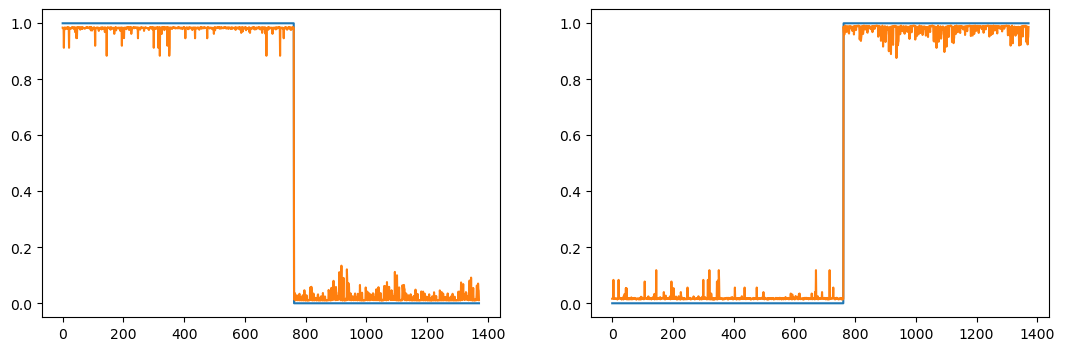

In [113]:
plt.figure(figsize=(13,4))
_,_,_,_,_,y_SGDm = predict(X,W1,b1,W2,b2,W3,b3)
plt.subplot(121)
plt.plot(t[:,0])
plt.plot(y_SGDm[:,0])
plt.subplot(122)
plt.plot(t[:,1])
plt.plot(y_SGDm[:,1])

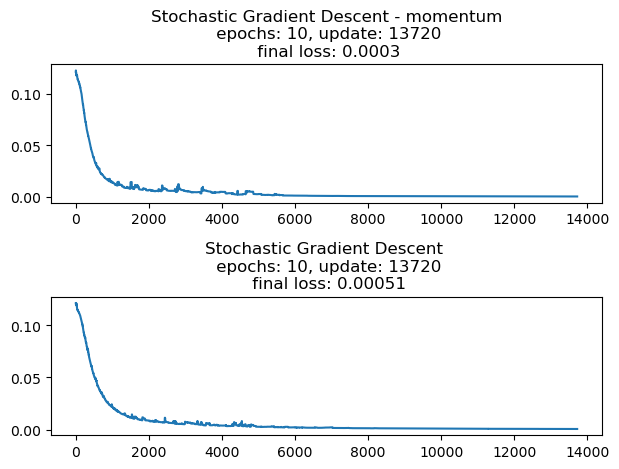

In [114]:
plt.subplot(211)
title = f'Stochastic Gradient Descent - momentum\n epochs: {epochs_SGDm}, update: {num_update_SGDm}\
\n final loss: {round(loss_SGDm[-1],5)}'
plt.plot(loss_SGDm)
plt.title(title)

plt.subplot(212)
title = f'Stochastic Gradient Descent \n epochs: {epochs_SGD}, update: {num_update_SGD}\
\n final loss: {round(loss_SGD[-1],5)}'
plt.plot(loss_SGD)
plt.title(title)

plt.tight_layout()